<a href="https://colab.research.google.com/github/naharluna/Salary-Prediction-using-Regression-Models/blob/main/Salary_Prediction_for_Employees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Dataset**

In [142]:
import pandas as pd
sal_data = pd.read_csv('/content/drive/MyDrive/Dataset/Salary_Data.csv')

In [143]:
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


**Number of Rows and Columns**

In [144]:
sal_data.shape

(6704, 6)

##**Data Preprocessing**

In [145]:
sal_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

# Rename Columns

In [146]:
sal_data.columns=['Age', 'Gender', 'Degree', 'Job_title','Experience_Year','salary']

In [147]:
sal_data.head()

,Age,Gender,Degree,Job_title,Experience_Year,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [148]:
sal_data.dtypes

,0
Age,float64
Gender,object
Degree,object
Job_title,object
Experience_Year,float64
salary,float64


In [149]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              6702 non-null   float64
 1   Gender           6702 non-null   object 
 2   Degree           6701 non-null   object 
 3   Job_title        6702 non-null   object 
 4   Experience_Year  6701 non-null   float64
 5   salary           6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [150]:
sal_data1 = sal_data.copy()

In [151]:
sal_data1.shape


(6704, 6)

In [152]:
sal_data1.head()

,Age,Gender,Degree,Job_title,Experience_Year,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


**Data Exploration and Visualization**

In [153]:
sal_data1.describe()

,Age,Experience_Year,salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [154]:
corr = sal_data1[['Age',	'Experience_Year',	'salary']].corr()
corr

,Age,Experience_Year,salary
Age,1.000000,0.937655,0.728053
Experience_Year,0.937655,1.000000,0.808969
salary,0.728053,0.808969,1.000000


In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

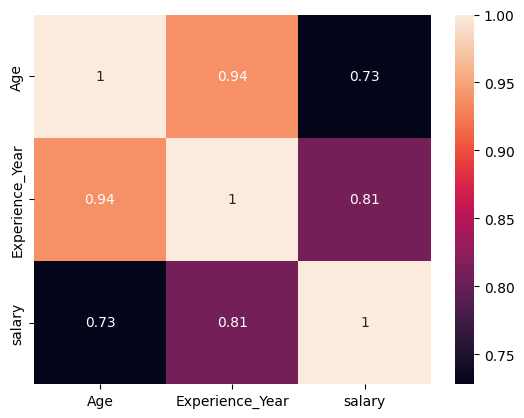

In [156]:
sns.heatmap(corr, annot = True)

In [157]:
sal_data1['Degree'].value_counts()

,count
Degree,
Bachelor's Degree,2267
Master's Degree,1573
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


<Axes: xlabel='Degree'>

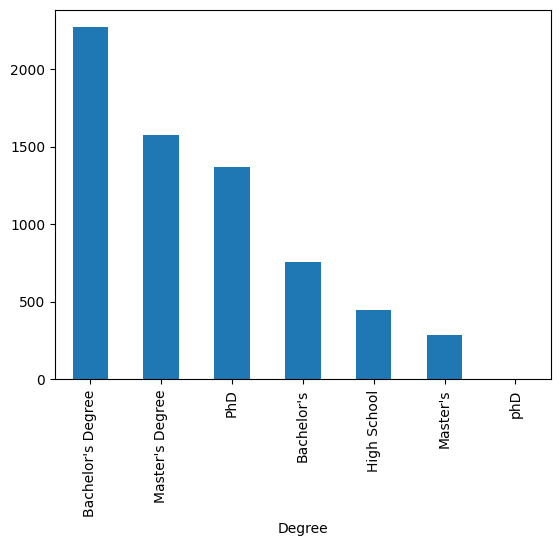

In [158]:
sal_data1['Degree'].value_counts().plot(kind = 'bar')

In [159]:
sal_data1['Job_title'].value_counts()

,count
Job_title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Account Manager,1
Help Desk Analyst,1
Senior Training Specialist,1


<Axes: ylabel='Gender'>

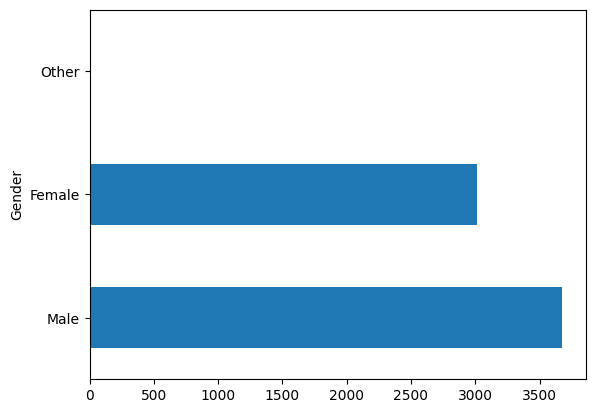

In [160]:
sal_data1['Gender'].value_counts().plot(kind = 'barh')

####Numerical Variable - Plot Histogram/Box plot:

<Axes: ylabel='Frequency'>

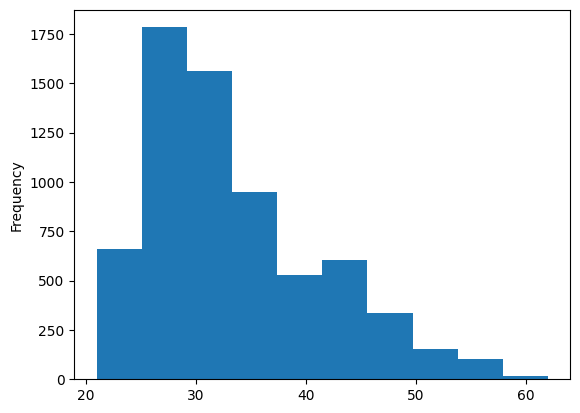

In [161]:
sal_data1['Age'].plot(kind = 'hist')

<Axes: >

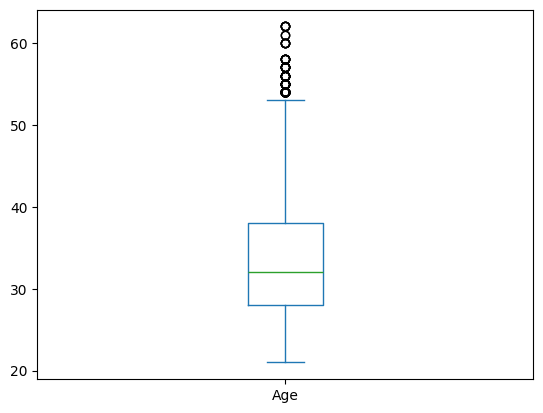

In [162]:
sal_data1.Age.plot(kind = 'box')

<Axes: ylabel='Frequency'>

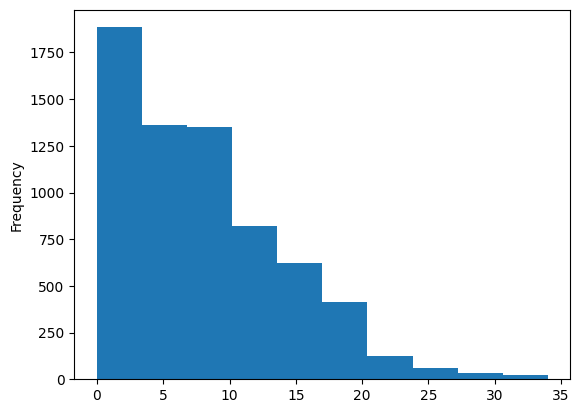

In [163]:
sal_data1['Experience_Year'].plot(kind = 'hist')

<Axes: >

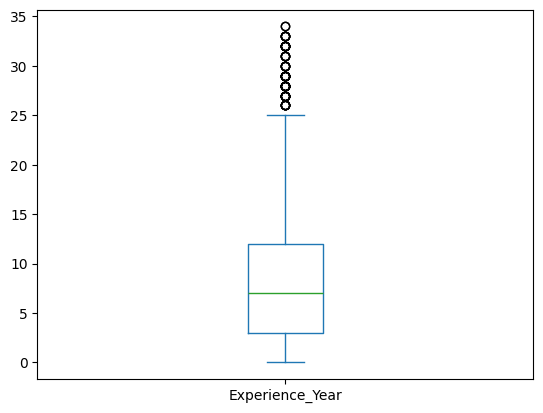

In [164]:
sal_data1.Experience_Year.plot(kind = 'box')

<Axes: ylabel='Frequency'>

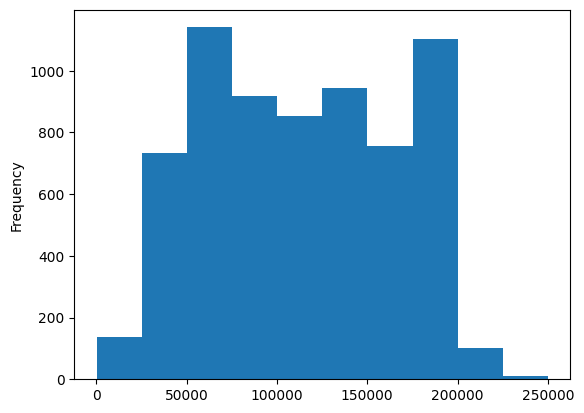

In [165]:
sal_data1['salary'].plot(kind = 'hist')

<Axes: >

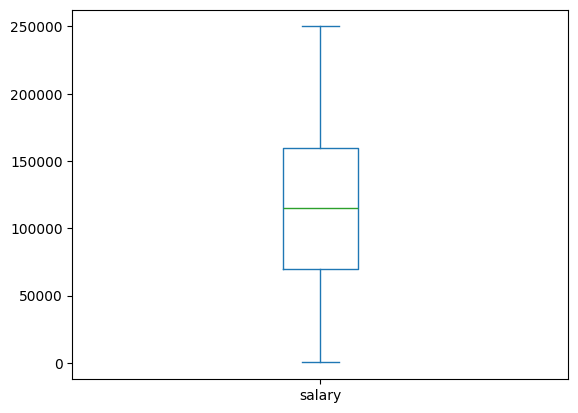

In [166]:
sal_data1.salary.plot(kind = 'box')

In [167]:
# Identify numerical features
numerical_features = ['Age', 'Experience_Year', 'salary']

# Remove outliers using the IQR method
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)  # First quartile (25%)
    Q3 = df[feature].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Apply outlier removal to each numerical feature
for feature in numerical_features:
    sal_data1 = remove_outliers_iqr(sal_data1, feature)

# Check the shape of the data after outlier removal
print(f"Data shape after outlier removal: {sal_data1.shape}")


Data shape after outlier removal: (6551, 6)


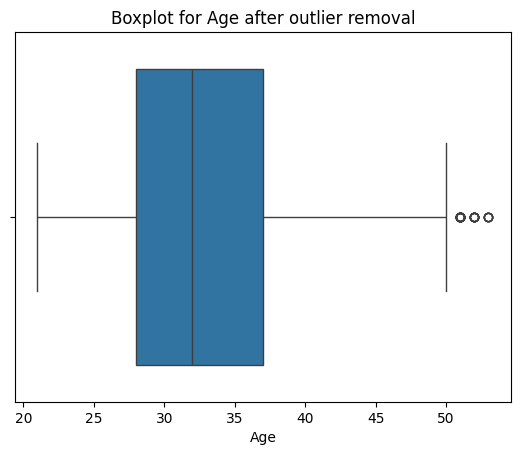

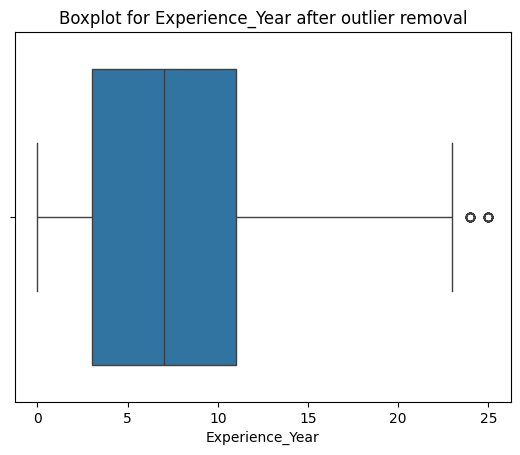

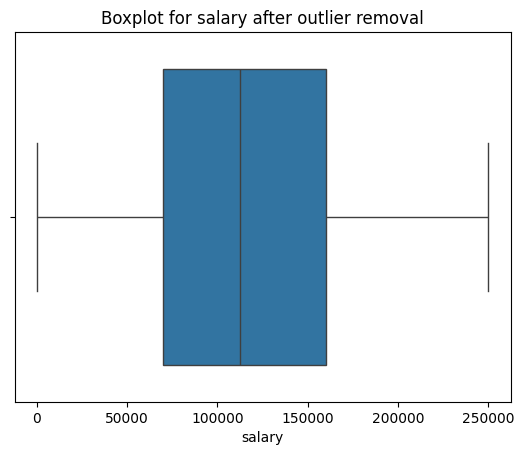

In [168]:
# Visualize features after outlier removal
for feature in numerical_features:
    sns.boxplot(x=sal_data1[feature])
    plt.title(f"Boxplot for {feature} after outlier removal")
    plt.show()


In [169]:
sal_data1.head()

,Age,Gender,Degree,Job_title,Experience_Year,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


##**Feature Engineering**:

**Label Coding**

In [170]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

### Check for imbalance in target variable (salary)

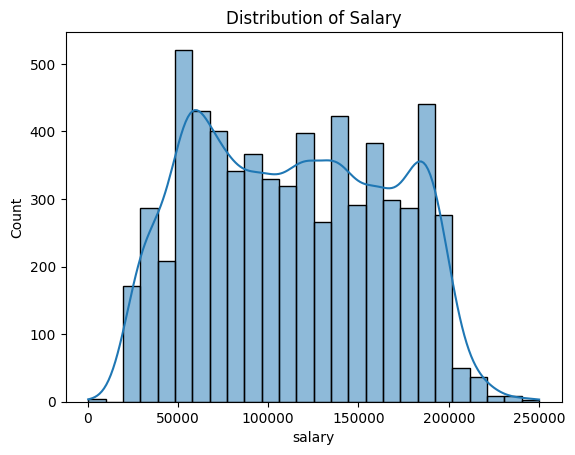

In [171]:
sns.histplot(sal_data1['salary'], kde=True)
plt.title('Distribution of Salary')
plt.show()

In [172]:
categorical_features = ['Gender', 'Degree', 'Job_title']
numerical_features = ['Age', 'Experience_Year']

In [173]:
sal_data1['Gender_Encode'] = Label_Encoder.fit_transform(sal_data1['Gender'])

In [174]:
sal_data1['Degree_Encode'] = Label_Encoder.fit_transform(sal_data1['Degree'])

In [175]:
sal_data1['Job_title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_title'])

**Data after Label Encoding:**

In [176]:
sal_data1.head()

,Age,Gender,Degree,Job_title,Experience_Year,salary,Gender_Encode,Degree_Encode,Job_title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,176
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,3,18
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,5,145
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,116
4,52.0,Male,Master's,Director,20.0,200000.0,1,3,26


In [177]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

**Log transformation**

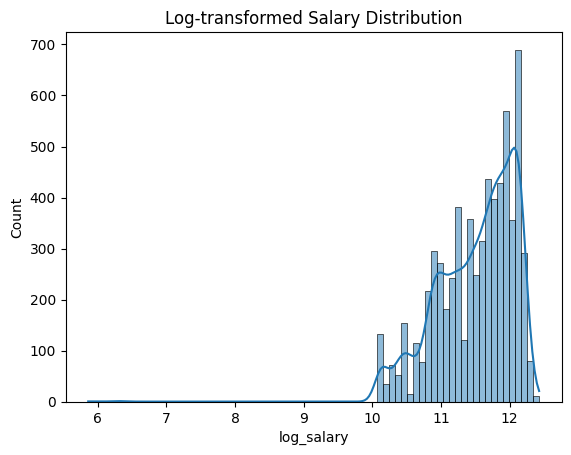

In [178]:
# Apply log transformation to salary if it is skewed
sal_data1['log_salary'] = np.log1p(sal_data1['salary'])

# Check the distribution after log transformation
sns.histplot(sal_data1['log_salary'], kde=True)
plt.title('Log-transformed Salary Distribution')
plt.show()

# Update the target variable to the transformed one
y = sal_data1['log_salary']

#### Splitting the data into features and target

In [179]:
X = sal_data1.drop(columns=['salary', 'log_salary'])
y = sal_data1['log_salary']

#### Checking imbalance in categorical features (if any)

In [180]:
print(X['Gender'].value_counts())
print(X['Degree'].value_counts())
print(X['Job_title'].value_counts())

Gender
Male      3564
Female    2979
Other        8
Name: count, dtype: int64
Degree
Bachelor's Degree    2252
Master's Degree      1552
PhD                  1259
Bachelor's            756
High School           442
Master's              288
phD                     1
Name: count, dtype: int64
Job_title
Software Engineer             518
Data Scientist                453
Data Analyst                  363
Product Manager               313
Senior Project Engineer       308
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Supply Chain Analyst            1
Name: count, Length: 192, dtype: int64


In [181]:
print(f"Before resampling: {X.shape[0]} samples")

Before resampling: 6551 samples


In [182]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# **Preprocessing Pipeline**

In [183]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial Features
            ('scaler', StandardScaler())  # Scaling
        ]), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)  # One-Hot Encoding
    ]
)

### Defining Features and Target

In [184]:
X = sal_data1.drop(columns=['salary'])
y = sal_data1['salary']

## Splitting Data

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [187]:
# Define StandardScaler Preprocessor
standard_scaler_preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial Features
            ('scaler', StandardScaler())  # Standard Scaling
        ]), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)  # One-Hot Encoding
    ]
)

In [188]:
# Define MinMaxScaler Preprocessor
min_max_scaler_preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial Features
            ('scaler', MinMaxScaler())  # MinMax Scaling
        ]), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)  # One-Hot Encoding
    ]
)

# **Individual Models**

####**Ridge Regressor Model**

In [189]:
ridge_standard = Pipeline([
    ('preprocessor', standard_scaler_preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

In [190]:
ridge_minmax = Pipeline([
    ('preprocessor', min_max_scaler_preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

####**Lasso Regressor Model**

In [191]:
lasso_standard = Pipeline([
    ('preprocessor', standard_scaler_preprocessor),
    ('regressor', Lasso(alpha=0.1))
])

In [192]:
lasso_minmax = Pipeline([
    ('preprocessor', min_max_scaler_preprocessor),
    ('regressor', Lasso(alpha=0.1))
])


####**Random Forest Regressor Model**

In [193]:
rf_standard = Pipeline([
    ('preprocessor', standard_scaler_preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [194]:
rf_minmax = Pipeline([
    ('preprocessor', min_max_scaler_preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

####**Gradient Boosting Regressor Model**

In [195]:
gbr_standard = Pipeline([
    ('preprocessor', standard_scaler_preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

In [196]:
gbr_minmax = Pipeline([
    ('preprocessor', min_max_scaler_preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

### **Stacking Ensemble**

In [197]:
stacking_model = StackingRegressor(
    estimators=[
        ('ridge_standard', ridge_standard),
        ('ridge_minmax', ridge_minmax),
        ('lasso_standard', lasso_standard),
        ('lasso_minmax', lasso_minmax),
        ('rf_standard', rf_standard),
        ('rf_minmax', rf_minmax),
        ('gbr_standard', gbr_standard),
        ('gbr_minmax', gbr_minmax)
    ],
    final_estimator=LinearRegression()
)


In [140]:
# Train Models and Evaluate

results = {}

for name, model in stacking_model.named_estimators.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {
        "R² Score": r2,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "Mean Absolute Error": mae
    }

Training ridge_standard...
Training ridge_minmax...
Training lasso_standard...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 574963037142.3696, tolerance: 1412484014.257216
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training lasso_minmax...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 555366166841.8394, tolerance: 1412484014.257216
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training rf_standard...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training rf_minmax...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training gbr_standard...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training gbr_minmax...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [198]:
# Display Results
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")


ridge_standard:
  R² Score: 0.9132566162665706
  Mean Squared Error: 241975824.35406798
  Root Mean Squared Error: 15555.572132006844
  Mean Absolute Error: 11128.539601873817

ridge_minmax:
  R² Score: 0.9105592850790455
  Mean Squared Error: 249500190.0124692
  Root Mean Squared Error: 15795.575013669784
  Mean Absolute Error: 11172.795696476678

lasso_standard:
  R² Score: 0.9103606763161433
  Mean Squared Error: 250054220.96052283
  Root Mean Squared Error: 15813.10282520552
  Mean Absolute Error: 10964.499761309347

lasso_minmax:
  R² Score: 0.9103569021436092
  Mean Squared Error: 250064749.2391173
  Root Mean Squared Error: 15813.435719005447
  Mean Absolute Error: 10963.833605660531

rf_standard:
  R² Score: 0.981001646807328
  Mean Squared Error: 52997035.36230473
  Root Mean Squared Error: 7279.906274280235
  Mean Absolute Error: 2756.6522129915256

rf_minmax:
  R² Score: 0.9809554043927763
  Mean Squared Error: 53126031.32602767
  Root Mean Squared Error: 7288.760616595092


In [199]:
# Train and evaluate the ensemble
print("Training Full Ensemble Stacking Regressor...")
stacking_model.fit(X_train, y_train)

Training Full Ensemble Stacking Regressor...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 574963037142.3696, tolerance: 1412484014.257216
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 555366166841.8394, tolerance: 1412484014.257216
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categori

StackingRegressor(estimators=[('ridge_standard',
                               Pipeline(steps=[('preprocessor',
                                                ColumnTransformer(transformers=[('num',
                                                                                 Pipeline(steps=[('poly',
                                                                                                  PolynomialFeatures(include_bias=False)),
                                                                                                 ('scaler',
                                                                                                  StandardScaler())]),
                                                                                 ['Age',
                                                                                  'Experience_Year']),
                                                                                ('cat',
                                                                                 OneHotEncoder(drop='first',
                                                                                               handle_unknown='ignore'),
                                                                                 ['Gender',
                                                                                  'Degree',
                                                                                  'Job_title'])])),
                                               ('regressor', Ri...
                               Pipeline(steps=[('preprocessor',
                                                ColumnTransformer(transformers=[('num',
                                                                                 Pipeline(steps=[('poly',
                                                                                                  PolynomialFeatures(include_bias=False)),
                                                                                                 ('scaler',
                                                                                                  MinMaxScaler())]),
                                                                                 ['Age',
                                                                                  'Experience_Year']),
                                                                                ('cat',
                                                                                 OneHotEncoder(drop='first',
                                                                                               handle_unknown='ignore'),
                                                                                 ['Gender',
                                                                                  'Degree',
                                                                                  'Job_title'])])),
                                               ('regressor',
                                                GradientBoostingRegressor(random_state=42))]))],
                  final_estimator=LinearRegression())

In [200]:
# Make predictions
y_pred = stacking_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categ

In [201]:
final_estimator = stacking_model.final_estimator_

In [202]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(stacking_model, X_test, y_test, n_repeats=10, random_state=42, scoring='r2')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categ

In [203]:
# Create a DataFrame to visualize the feature importance
importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance Mean": perm_importance.importances_mean,
    "Importance Std": perm_importance.importances_std
}).sort_values(by="Importance Mean", ascending=False)

print("Permutation Importance:")
print(importance_df)



Permutation Importance:
            Feature  Importance Mean  Importance Std
4   Experience_Year         1.479996        0.031067
3         Job_title         0.272787        0.005159
0               Age         0.108015        0.005065
2            Degree         0.094606        0.006916
1            Gender         0.009334        0.001116
5     Gender_Encode         0.000000        0.000000
6     Degree_Encode         0.000000        0.000000
7  Job_title_Encode         0.000000        0.000000
8        log_salary         0.000000        0.000000


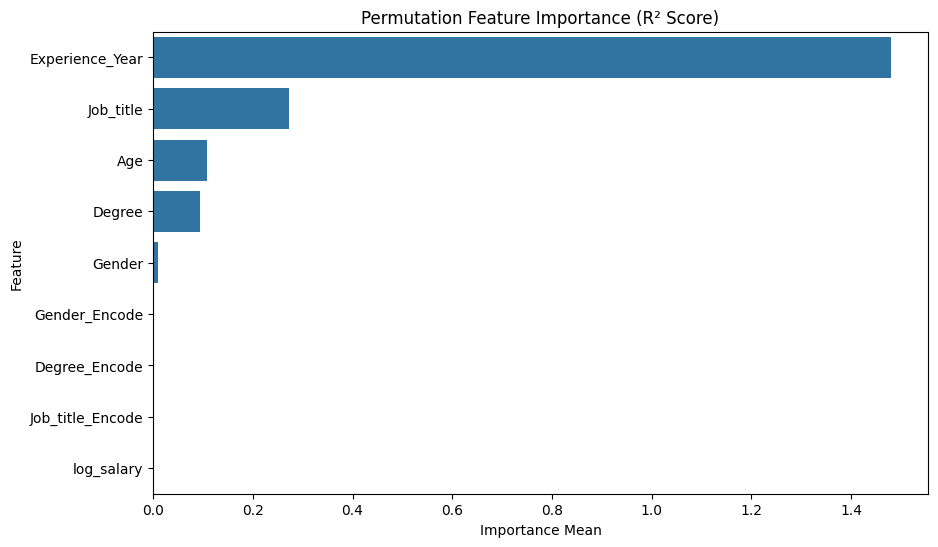

In [204]:
# Visualize the permutation importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance Mean", y="Feature", orient="h")
plt.title("Permutation Feature Importance (R² Score)")
plt.show()

In [205]:
# Now, let's visualize the impact of permuting `Experience_Year`
feature_to_permute = 'Experience_Year'

In [206]:
from sklearn.impute import SimpleImputer

# Imputer to handle NaN values (using mean strategy)
imputer = SimpleImputer(strategy='mean')

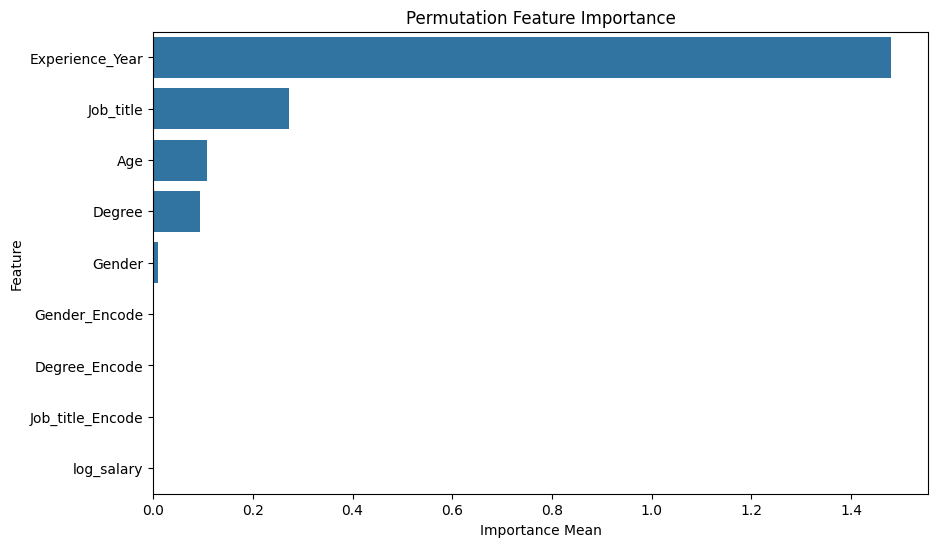

In [207]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance Mean", y="Feature", orient="h")
plt.title("Permutation Feature Importance")
plt.show()

In [208]:
# Generate predictions
y_pred = stacking_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categ

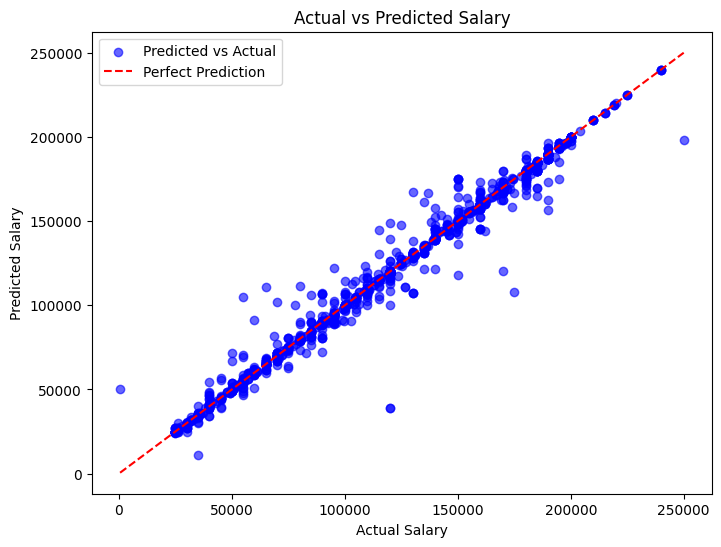

In [209]:
# Create a scatter plot to visualize Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")

# Plot the diagonal line where y_actual = y_pred (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")

# Add labels and title
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()

# Show the plot
plt.show()

In [210]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print final evaluation
print("\n--- Final Evaluation of Stacking Regressor ---")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")



--- Final Evaluation of Stacking Regressor ---
R² Score: 0.9814
Mean Squared Error (MSE): 51804740.3205
Root Mean Squared Error (RMSE): 7197.5510
Mean Absolute Error (MAE): 2950.8429


In [211]:
# Mean of actual values
mean_actual = np.mean(y_test)

# Percentage calculations
mse_percentage = (mse / mean_actual**2) * 100
rmse_percentage = (rmse / mean_actual) * 100
mae_percentage = (mae / mean_actual) * 100

print(mean_actual)
# Print all metrics
print("\n--- Final Evaluation Metrics ---")
print(f"R² Score: {r2:.4f} ({r2 * 100:.2f}%)")
print(f"Mean Squared Error (MSE): {mse:.4f}  ({mse_percentage:.2f}% of mean squared actual)")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} ({rmse_percentage:.2f}% of mean actual)")
print(f"Mean Absolute Error (MAE): {mae:.4f} ({mae_percentage:.2f}% of mean actual)")


114583.09458428681

--- Final Evaluation Metrics ---
R² Score: 0.9814 (98.14%)
Mean Squared Error (MSE): 51804740.3205  (0.39% of mean squared actual)
Root Mean Squared Error (RMSE): 7197.5510 (6.28% of mean actual)
Mean Absolute Error (MAE): 2950.8429 (2.58% of mean actual)
